Exercício 1 – Higienização Básica
a) Verifique valores nulos e tipos incorretos.
b) Corrija a coluna de datas inválidas.
c) Normalize os nomes dos turnos e dias da semana.

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("faltas_treinamento_sujo.xlsx")
# print(df.head())
# print(df.isnull())
# print(df.dtypes)
df['Turno'] = df['Turno'].str.title().replace({"Manha": "Manhã"})
df['Dia_da_Semana_Ultima_Falta'] = df['Dia_da_Semana_Ultima_Falta'].str.title()
print(df)


                Nome Departamento  Turno  Faltas Dia_da_Semana_Ultima_Falta  \
0    Colaborador_001    Operações  Manhã      14                     Quarta   
1    Colaborador_002    Operações  Manhã       1                    Segunda   
2    Colaborador_003       Vendas  Manhã       3                    Segunda   
3    Colaborador_004    Marketing  Manhã       3                    Segunda   
4    Colaborador_005           RH  Manhã       1                     Quarta   
..               ...          ...    ...     ...                        ...   
219  Colaborador_056    Operações  Tarde       2                    Segunda   
220  Colaborador_102       Vendas  Manhã       3                    Segunda   
221  Colaborador_188       Vendas  Manhã       3                    Segunda   
222  Colaborador_147    Marketing  Tarde       1                    Segunda   
223  Colaborador_092       Vendas  Manhã       0                     Quinta   

    Data_Ultima_Falta Evadiu  
0          18/01/202

Exercício 2 – Remoção e Substituição
a) Remova os registros duplicados.
b) Substitua os valores nulos da coluna Evadiu por “Desconhecido”.
c) Substitua os valores nulos da coluna Data_Ultima_Falta pela data mais comum.

In [6]:
# df.index.duplicated()
# df.dropna()
# # df['Evadiu'].fillna("Desconhecido")
df = df.dropna(subset=['Data_Ultima_Falta'])

df['Data_Ultima_Falta'] = pd.to_datetime(df['Data_Ultima_Falta'], errors='coerce')



C:\Users\matheus.Archanjo\AppData\Local\Temp\ipykernel_23240\962954497.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data_Ultima_Falta'] = pd.to_datetime(df['Data_Ultima_Falta'], errors='coerce')


In [7]:


data_minima = df['Data_Ultima_Falta'].min()
df['Data_Ultima_Falta'].fillna(data_minima, inplace=True)



# print(df['Data_Ultima_Falta'].isna().sum())
# print(len(df))


C:\Users\matheus.Archanjo\AppData\Local\Temp\ipykernel_23240\939470026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Data_Ultima_Falta'].fillna(data_minima, inplace=True)


Exercício 3 – Correções e Detecção de Outliers
a) Converta a coluna Faltas para tipo inteiro.
b) Substitua outliers de faltas por np.nan e depois pela mediana.
c) Crie um flag “Faltas_Suspeitas” para valores &gt; 10.

In [8]:
df['Faltas'] = (df['Faltas']).astype(int)

df['Faltas_Suspeitas'] = (df['Faltas'] > 10).astype(int)

print(df)

                Nome Departamento  Turno  Faltas Dia_da_Semana_Ultima_Falta  \
0    Colaborador_001    Operações  Manhã      14                     Quarta   
1    Colaborador_002    Operações  Manhã       1                    Segunda   
2    Colaborador_003       Vendas  Manhã       3                    Segunda   
3    Colaborador_004    Marketing  Manhã       3                    Segunda   
4    Colaborador_005           RH  Manhã       1                     Quarta   
..               ...          ...    ...     ...                        ...   
219  Colaborador_056    Operações  Tarde       2                    Segunda   
220  Colaborador_102       Vendas  Manhã       3                    Segunda   
221  Colaborador_188       Vendas  Manhã       3                    Segunda   
222  Colaborador_147    Marketing  Tarde       1                    Segunda   
223  Colaborador_092       Vendas  Manhã       0                     Quinta   

    Data_Ultima_Falta Evadiu  Faltas_Suspeitas  
0 

Exercício 4 – Análise Descritiva Avançada
a) Qual o número total de evasões por departamento?
b) Qual é o percentual de evasão considerando apenas os que participaram do turno da tarde?
c) Qual é o desvio padrão de faltas por turno?

In [9]:
numero_faltas = df.groupby('Departamento')['Faltas'].sum()

df_tarde = df[df['Turno'] == 'Tarde']

faltas_tarde = df_tarde.groupby('Departamento')['Faltas'].sum()

total_faltas_tarde = df_tarde['Faltas'].sum()

percentual_evasao = (faltas_tarde / total_faltas_tarde) * 100

desvio_padrao_faltas = df.groupby('Turno')['Faltas'].std()

print(percentual_evasao.round(2), numero_faltas, desvio_padrao_faltas)

Departamento
Financeiro    22.35
Marketing     15.15
Operações     24.62
RH            10.23
TI            18.18
Vendas         9.47
Name: Faltas, dtype: float64 Departamento
Financeiro     84
Marketing     111
Operações     127
RH             69
TI             64
Vendas         76
Name: Faltas, dtype: int32 Turno
Manhã    2.675286
Tarde    2.376692
Name: Faltas, dtype: float64


Exercício 5 – Análise Temporal
a) Em qual mês ocorreu o maior número de faltas?
b) Crie uma coluna Semana_Ultima_Falta e descubra qual semana teve maior concentração de
ausências.
c) Faça uma análise cruzando dia da semana e quantidade de evasões.

In [10]:
df['Mes_Falta'] = df['Data_Ultima_Falta'].dt.to_period('M')

mes_falta = df.groupby('Mes_Falta')['Faltas'].sum()

print(mes_falta)    

df['Semana_Evasao'] = df['Data_Ultima_Falta'].dt.to_period('W')

semana_falta = df.groupby('Dia_da_Semana_Ultima_Falta')['Faltas'].sum()

print(semana_falta)

Mes_Falta
2024-01    214
2024-02    147
2024-03    170
Freq: M, Name: Faltas, dtype: int32
Dia_da_Semana_Ultima_Falta
Quarta     123
Quinta      88
Segunda    166
Sexta       80
Terça       74
Name: Faltas, dtype: int32


Exercício 6 – Análise de Risco
a) Crie a coluna Risco_Evasao com três categorias: &quot;Alto&quot;, &quot;Moderado&quot;, &quot;Baixo&quot;.
b) Gere uma tabela com a distribuição percentual de risco por departamento.
c) Há relação entre risco alto e turno da tarde?c

In [11]:
def risco(faltas):
    if faltas > 10:
        return "Alto"
    elif faltas >= 6:
        return "Moderado"
    else:
        return "Baixo"

df['Risco_Evasao'] = df['Faltas'].apply(risco)

tabela_contagem = pd.crosstab(df['Departamento'], df['Risco_Evasao'])
tabela_periodo = pd.crosstab(df['Turno'], df['Risco_Evasao'])
tabela_percentual = tabela_contagem.div(tabela_contagem.sum(axis=1), axis=0) * 100
tabela_percentual_turno = tabela_periodo.div(tabela_periodo.sum(axis=1), axis=0) * 100
print(tabela_percentual, tabela_percentual_turno)


Risco_Evasao      Alto      Baixo  Moderado
Departamento                               
Financeiro    5.714286  94.285714  0.000000
Marketing     2.380952  92.857143  4.761905
Operações     3.773585  94.339623  1.886792
RH            3.225806  96.774194  0.000000
TI            3.333333  96.666667  0.000000
Vendas        3.030303  93.939394  3.030303 Risco_Evasao      Alto      Baixo  Moderado
Turno                                      
Manhã         4.587156  93.577982  1.834862
Tarde         2.608696  95.652174  1.739130


Exercício 7 – Visualizações Estratégicas
a) Gráfico de barras: número de faltas por departamento.
b) Gráfico de pizza: distribuição de risco de evasão.
c) Heatmap cruzando Turno e Risco_Evasao.

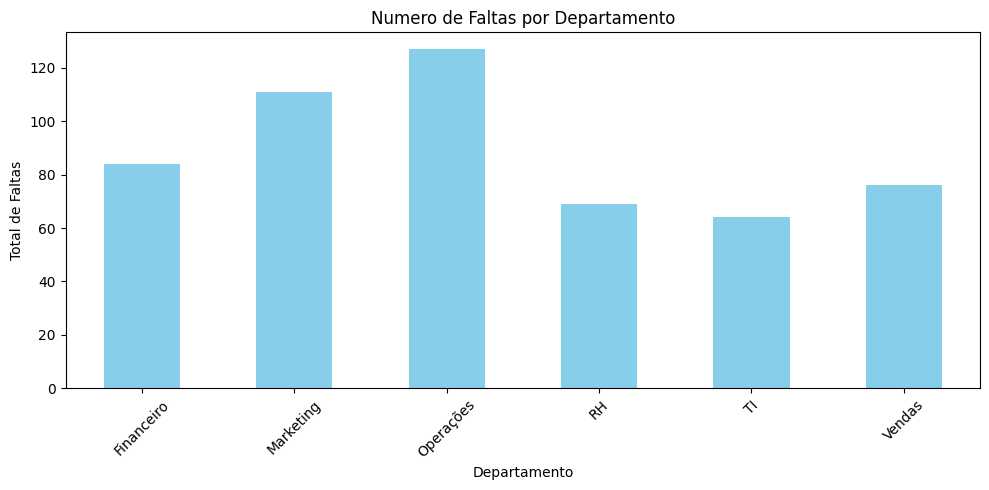

In [12]:


faltas_por_departamento = df.groupby('Departamento')['Faltas'].sum()

faltas_por_departamento.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('Numero de Faltas por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Total de Faltas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


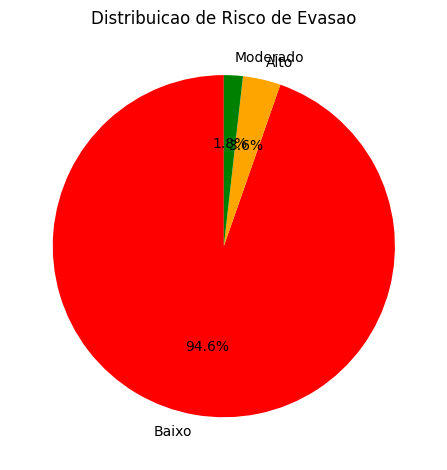

In [17]:
distribuicao_risco = df['Risco_Evasao'].value_counts()
distribuicao_risco.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'orange', 'green'])

# plt.figure(figsize=(10,10))
plt.title('Distribuicao de Risco de Evasao')
plt.ylabel('')
plt.tight_layout()
plt.show()

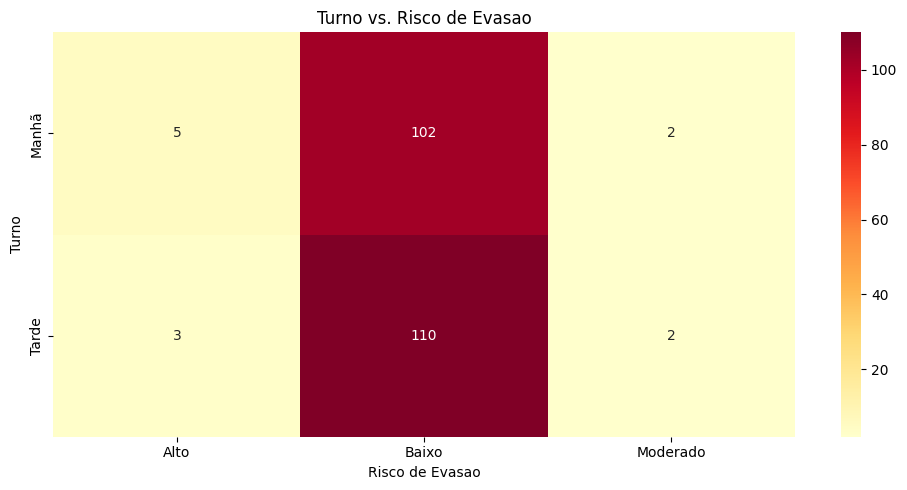

In [14]:
import seaborn as sns

tabela_cruzada = pd.crosstab(df['Turno'], df['Risco_Evasao'])

plt.figure(figsize=(10,5))
sns.heatmap(tabela_cruzada, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Turno vs. Risco de Evasao')
plt.xlabel('Risco de Evasao')
plt.ylabel('Turno')
# plt.grid()
plt.tight_layout()
plt.show()
